In [1]:
import os

os.chdir('E:\\aBAC\\LTU sem 2\\Data science project')
os.getcwd()

'E:\\aBAC\\LTU sem 2\\Data science project'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
pa=pd.read_csv('Target Audience prediction model (Machine learning v1) (Responses)5k+.csv')

In [4]:
pa.head(5)

,Your Age,Your Occupation,Your Gender,Do you prefer to shop online?,How often do you shop online?,Things you bought from an online shop mostly:,How much do you spend usually on online shopping per month (BDT) ?,What you think is the most costliest product to buy from an online shop?,What you think is the most Budget or cheapest product to buy from an online shop?,How likely are you to recommend 'Online-shopping' to a friend or colleague?
0,31 - 40,Businessman,Male,Yes,On a daily basis,Stationary,Less than hundred,House hold things,Accessories,Neutral
1,18 - 25,College student,Female,Yes,Often,Accessories,500 - 1000,Electronics,Accessories,Neutral
2,18 - 25,Varsity student,Female,Yes,Often,Accessories,500 - 1000,Electronics,Groceries,Not going to recommend
3,26 - 30,Varsity student,Female,Yes,On a daily basis,Accessories,100 - 500,House hold things,Stationary,Neutral
4,18 - 25,Varsity student,Female,Yes,Often,Accessories,5000 - 10000,House hold things,Accessories,Willing


In [5]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5193 entries, 0 to 5192
Data columns (total 10 columns):
 #   Column                                                                             Non-Null Count  Dtype 
---  ------                                                                             --------------  ----- 
 0   Your Age                                                                           5193 non-null   object
 1   Your Occupation                                                                    5193 non-null   object
 2   Your Gender                                                                        5193 non-null   object
 3   Do you prefer to shop online?                                                      5193 non-null   object
 4   How often do you shop online?                                                      5193 non-null   object
 5   Things you bought from an online shop mostly:                                      5193 non-null   object
 6   

In [6]:
pa.rename(columns = {'Your Age':'Age'}, inplace=True)
pa.rename(columns = {'Your Occupation':'Occupation'}, inplace=True)
pa.rename(columns = {'Your Gender':'Gender'}, inplace=True)
pa.rename(columns = {'Do you prefer to shop online?':'Online-shop preference'}, inplace=True)
pa.rename(columns = {'How often do you shop online?':'Regularity'}, inplace=True)
pa.rename(columns = {'Things you bought from an online shop mostly:':'Mostly shopped item'}, inplace=True)

In [7]:
pa.head()

,Age,Occupation,Gender,Online-shop preference,Regularity,Mostly shopped item,How much do you spend usually on online shopping per month (BDT) ?,What you think is the most costliest product to buy from an online shop?,What you think is the most Budget or cheapest product to buy from an online shop?,How likely are you to recommend 'Online-shopping' to a friend or colleague?
0,31 - 40,Businessman,Male,Yes,On a daily basis,Stationary,Less than hundred,House hold things,Accessories,Neutral
1,18 - 25,College student,Female,Yes,Often,Accessories,500 - 1000,Electronics,Accessories,Neutral
2,18 - 25,Varsity student,Female,Yes,Often,Accessories,500 - 1000,Electronics,Groceries,Not going to recommend
3,26 - 30,Varsity student,Female,Yes,On a daily basis,Accessories,100 - 500,House hold things,Stationary,Neutral
4,18 - 25,Varsity student,Female,Yes,Often,Accessories,5000 - 10000,House hold things,Accessories,Willing


In [8]:
pa.drop(["How much do you spend usually on online shopping per month (BDT) ?",
         "What you think is the most costliest product to buy from an online shop?",
         "What you think is the most Budget or cheapest product to buy from an online shop?",
         "How likely are you to recommend 'Online-shopping' to a friend or colleague?"], axis=1, inplace=True)

In [9]:
pa.head(10)

,Age,Occupation,Gender,Online-shop preference,Regularity,Mostly shopped item
0,31 - 40,Businessman,Male,Yes,On a daily basis,Stationary
1,18 - 25,College student,Female,Yes,Often,Accessories
2,18 - 25,Varsity student,Female,Yes,Often,Accessories
3,26 - 30,Varsity student,Female,Yes,On a daily basis,Accessories
4,18 - 25,Varsity student,Female,Yes,Often,Accessories
5,Below 18,College student,Female,Yes,On a daily basis,Groceries
6,31 - 40,Job seeker,Female,No,Occasionally,House-hold things
7,18 - 25,College student,Female,Yes,Often,Accessories
8,18 - 25,College student,Male,Yes,Often,Clothing
9,26 - 30,Job holder,Female,No,Occasionally,House-hold things


In [10]:
pa['Age'].value_counts()

18 - 25     2769
31 - 40      869
26 - 30      863
Below 18     692
Name: Age, dtype: int64

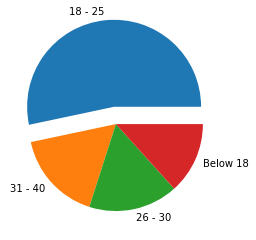

In [11]:
y=pa['Age'].value_counts()
mylabels = ["18 - 25", "31 - 40", "26 - 30", "Below 18"]
myexplode = (0.2, 0, 0, 0)

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show()

In [12]:
def change_age(cols):
    Age= cols[0]
    
    if Age=='18 - 25':
        return 1
    else:
        return 0

In [13]:
pa['Age']= pa[['Age']].apply(change_age, axis=1)
pa.head()

,Age,Occupation,Gender,Online-shop preference,Regularity,Mostly shopped item
0,0,Businessman,Male,Yes,On a daily basis,Stationary
1,1,College student,Female,Yes,Often,Accessories
2,1,Varsity student,Female,Yes,Often,Accessories
3,0,Varsity student,Female,Yes,On a daily basis,Accessories
4,1,Varsity student,Female,Yes,Often,Accessories


In [14]:
pa['Occupation'].value_counts()

College student    1758
Varsity student    1655
Job holder          603
Job seeker          551
School Student      332
Businessman         294
Name: Occupation, dtype: int64

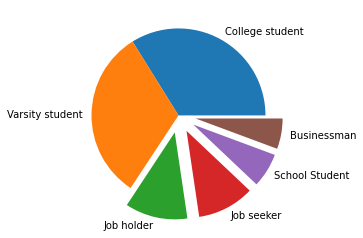

In [15]:
y=pa['Occupation'].value_counts()
mylabels = ["College student", "Varsity student", "Job holder","Job seeker", "School Student", "Businessman"]
myexplode = (0, 0, 0.2, 0.2, 0.2, 0.2)

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show()

In [16]:
def change_occupation(cols):
    Occupation= cols[0]
    
    if Occupation=='College student' or Occupation=='Varsity student':
        return 1
    else:
        return 0

In [17]:
pa['Occupation']= pa[['Occupation']].apply(change_occupation, axis=1)
pa.head()

,Age,Occupation,Gender,Online-shop preference,Regularity,Mostly shopped item
0,0,0,Male,Yes,On a daily basis,Stationary
1,1,1,Female,Yes,Often,Accessories
2,1,1,Female,Yes,Often,Accessories
3,0,1,Female,Yes,On a daily basis,Accessories
4,1,1,Female,Yes,Often,Accessories


In [18]:
pa['Gender'].value_counts()

Male      2630
Female    2508
Other       55
Name: Gender, dtype: int64

In [19]:
pa= pa[pa['Gender'] != 'Other']

In [20]:
pa['Gender'].value_counts()

Male      2630
Female    2508
Name: Gender, dtype: int64

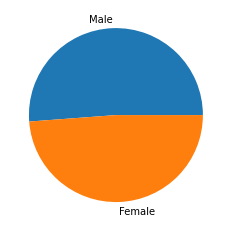

In [21]:
y=pa['Gender'].value_counts()
mylabels = ["Male", "Female"]
myexplode = (0, 0)

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show()

In [22]:
def change_gender(rows):
    Gender=rows[0]
    
    if Gender=='Male':
        return 1
    else:
        return 0

In [23]:
pa['Gender']= pa[['Gender']].apply(change_gender, axis=1)
pa.head()

,Age,Occupation,Gender,Online-shop preference,Regularity,Mostly shopped item
0,0,0,1,Yes,On a daily basis,Stationary
1,1,1,0,Yes,Often,Accessories
2,1,1,0,Yes,Often,Accessories
3,0,1,0,Yes,On a daily basis,Accessories
4,1,1,0,Yes,Often,Accessories


In [24]:
pa['Online-shop preference'].value_counts()

Yes    4260
No      878
Name: Online-shop preference, dtype: int64

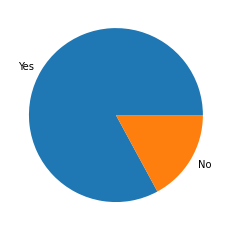

In [25]:
y=pa['Online-shop preference'].value_counts()
mylabels = ["Yes", "No"]
myexplode = (0, 0)

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show()


In [26]:
def change_osp(rows):
    osp=rows[0]
    
    if osp=='Yes':
        return 1
    else:
        return 0

In [27]:
pa['Online-shop preference']= pa[['Online-shop preference']].apply(change_osp, axis=1)
pa.head()

,Age,Occupation,Gender,Online-shop preference,Regularity,Mostly shopped item
0,0,0,1,1,On a daily basis,Stationary
1,1,1,0,1,Often,Accessories
2,1,1,0,1,Often,Accessories
3,0,1,0,1,On a daily basis,Accessories
4,1,1,0,1,Often,Accessories


In [28]:
pa['Regularity'].value_counts()

On a daily basis    2147
Often               2113
Occasionally         878
Name: Regularity, dtype: int64

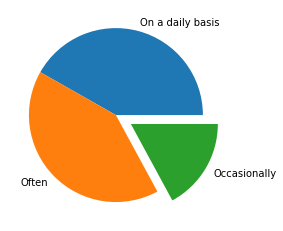

In [29]:
y=pa['Regularity'].value_counts()
mylabels = ["On a daily basis", "Often", "Occasionally"]
myexplode = (0, 0, 0.2)

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show()


In [30]:
def change_regularity(cols):
    Regularity= cols[0]
    
    if Regularity=='Often' or Regularity=='On a daily basis':
        return 1
    else:
        return 0

In [31]:
pa['Regularity']= pa[['Regularity']].apply(change_regularity, axis=1)

In [32]:
pa.head()

,Age,Occupation,Gender,Online-shop preference,Regularity,Mostly shopped item
0,0,0,1,1,1,Stationary
1,1,1,0,1,1,Accessories
2,1,1,0,1,1,Accessories
3,0,1,0,1,1,Accessories
4,1,1,0,1,1,Accessories


In [33]:
pa['Mostly shopped item'].value_counts()

Clothing             1194
Accessories          1175
Groceries            1153
Beauty products       638
House-hold things     443
Stationary            208
Electronics           205
Office supplies       122
Name: Mostly shopped item, dtype: int64

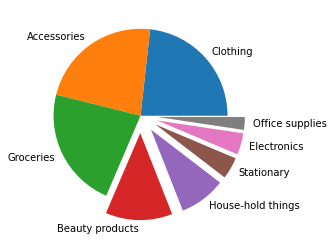

In [34]:
y=pa['Mostly shopped item'].value_counts()
mylabels = ["Clothing", "Accessories", "Groceries", "Beauty products", "House-hold things", "Stationary", "Electronics", "Office supplies"]
myexplode = (0, 0, 0, 0.2, 0.2, 0.2, 0.2, 0.2)

plt.pie(y, labels = mylabels, explode = myexplode)
plt.show()


In [35]:
def change_msi(cols):
    msi= cols[0]
    
    if msi=='Accessories' or msi=='Clothing' or msi=='Groceries':
        return 1
    else:
        return 0

In [36]:
pa['Mostly shopped item']= pa[['Mostly shopped item']].apply(change_msi, axis=1)

In [37]:
pa.head()

,Age,Occupation,Gender,Online-shop preference,Regularity,Mostly shopped item
0,0,0,1,1,1,0
1,1,1,0,1,1,1
2,1,1,0,1,1,1
3,0,1,0,1,1,1
4,1,1,0,1,1,1


<AxesSubplot:>

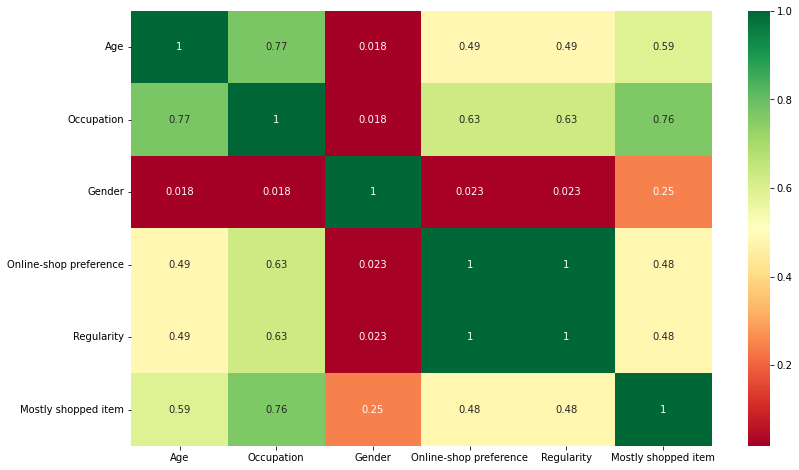

In [38]:
plt.subplots(figsize=(13,8))
sns.heatmap(pa.corr(), annot=True, cmap='RdYlGn')

In [39]:
pa.head()

,Age,Occupation,Gender,Online-shop preference,Regularity,Mostly shopped item
0,0,0,1,1,1,0
1,1,1,0,1,1,1
2,1,1,0,1,1,1
3,0,1,0,1,1,1
4,1,1,0,1,1,1


In [40]:
pa.to_csv(r'E:\aBAC\LTU sem 2\Data science project\exported_pa_dataframe5k+.csv', index = False, header=True)